In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
%matplotlib notebook
import scipy.stats
import os
from sklearn.utils import resample
os.getcwd()

'C:\\Users\\Kooroshoo\\Desktop\\data_hw2'

In [3]:
data1 = pd.read_csv("data_ex1.csv", header= None, names= ['x','y'])

Text(0.5, 0, 'x')

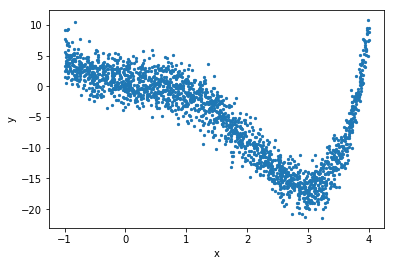

In [4]:
plt.scatter(data1['x'], data1['y'], s = 5)
plt.ylabel('y')
plt.xlabel('x')

In [5]:
def ls_trend_est(data, j):
    print("\nUsing a polynomial of degree: ",j)
    df1 = pd.DataFrame(columns=[0])
    df1[0] = data['x']**0
    for i in range(1,j):
        df1[i] = data['x']**i
    df1_transpose = df1.T
    A_dot_A_trans = df1_transpose.dot(df1)
    inv_p1 = pd.DataFrame(np.linalg.inv(A_dot_A_trans.values), A_dot_A_trans.columns, A_dot_A_trans.index)
    b = (inv_p1.dot(df1_transpose)).dot(data["y"])
#         b = np.array(list(reversed(b.values)))
    y_hat = data.loc[:,'x'].values.copy()
    for i in range(y_hat.size):
        temp = 0
        for j in range(b.size):
            temp += (y_hat[i]**j)*b[j]
        y_hat[i] = temp
    print('\nbeta values:\n',np.round(b,3))
    print('\ny_hat:\n',np.round(y_hat,3))
    min_beta_val = ((y_hat - data['y'])**2).sum()
    print('\nmin. beta values:', np.round(min_beta_val,3))
    plt.scatter(data['x'], data['y'], s = 3)
    plt.scatter(data['x'], y_hat, color='#FF0000')
    plt.show()
    return y_hat

#         plt.scatter(data["x"], data["y"], s = 3)
#         trendpoly = np.poly1d(b)
#         plt.plot(data["x"],trendpoly(data["x"]), color = 'orange')
#         print(trendpoly)
#         print("Given degree is =", j-1)
#         print("The residual sum of squares is =", (((df1.dot(b))-data['y'])**2).sum())
#         return(b)


Using a polynomial of degree:  2

beta values:
 0    0.297
1   -3.550
dtype: float64

y_hat:
 [ -4.029   0.093 -11.454 ...  -1.349  -9.005  -5.179]

min. beta values: 50249.325


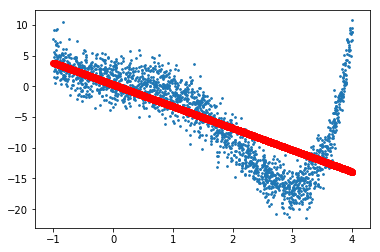

In [6]:
beta_2 = ls_trend_est(data1, 2)

### Minimum RSS values are returned when degree = 3, see graph below


Using a polynomial of degree:  3

beta values:
 0    0.431
1   -6.347
2    0.936
dtype: float64

y_hat:
 [ -5.911   0.07  -10.318 ...  -2.309  -9.77   -7.13 ]

min. beta values: 44303.278


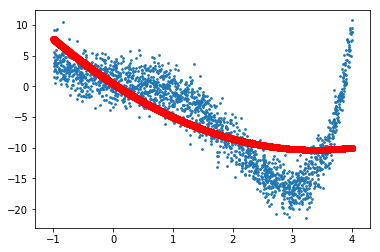

In [7]:
beta_3 = ls_trend_est(data1, 3)


Using a polynomial of degree:  4

beta values:
 0    3.634
1   -2.068
2   -5.589
3    1.462
dtype: float64

y_hat:
 [ -4.537   3.497 -11.419 ...   1.621 -13.851  -7.485]

min. beta values: 20423.226


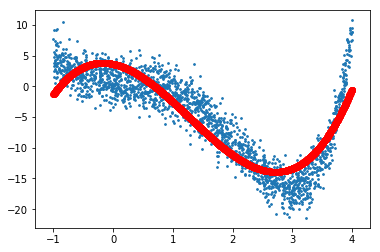

In [8]:
beta_4= ls_trend_est(data1, 4)


Using a polynomial of degree:  5

beta values:
 0    0.685
1    0.149
2    1.079
3   -3.494
4    0.829
dtype: float64

y_hat:
 [ -2.024   0.697 -14.196 ...   0.677 -15.291  -4.645]

min. beta values: 8349.923


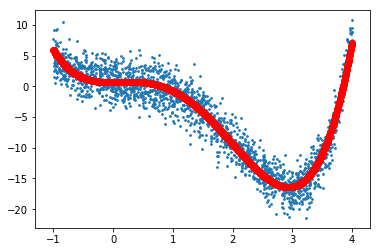

In [9]:
beta_5 = ls_trend_est(data1, 5)


Using a polynomial of degree:  6

beta values:
 0    0.884
1   -1.247
2    0.850
3   -1.738
4   -0.033
5    0.116
dtype: float64

y_hat:
 [ -2.277   0.815 -14.781 ...   0.317 -15.018  -4.565]

min. beta values: 7979.861


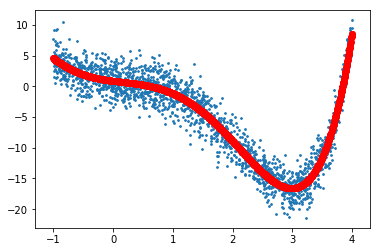

In [10]:
beta_6 = ls_trend_est(data1, 6)


Using a polynomial of degree:  7

beta values:
 0    0.918
1   -1.064
2    0.601
3   -1.919
4    0.255
5    0.013
6    0.012
dtype: float64

y_hat:
 [ -2.324   0.859 -14.824 ...   0.375 -14.956  -4.626]

min. beta values: 7974.11


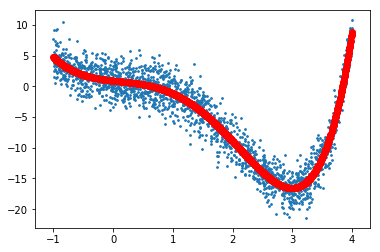

array([ -2.32369405,   0.85883248, -14.82434865, ...,   0.37521728,
       -14.95647652,  -4.62632649])

In [11]:
ls_trend_est(data1, 7)

### Problem 1.2

The graph below shows the actual (in blue) and after removing the trend (in red) using polynomial of degree 5

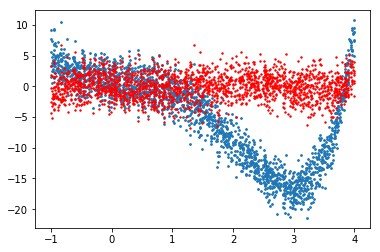

In [12]:
trend_removed_5 = data1['y'] - beta_5
plt.scatter(data1['x'], data1['y'], s = 3)
plt.scatter(data1['x'], trend_removed_5, color='#FF0000', s = 2)
plt.show()

Gaussian distribution after removing trend using polynomial of degree 5

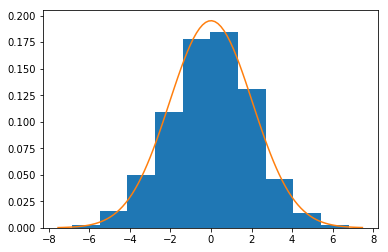

In [13]:
mean,std=st.norm.fit(trend_removed_5)
plt.hist(trend_removed_5, bins=10, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = st.norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()

### Problem 1.3

In [14]:
print('\nThe mean of the distribution =', np.around(mean, 3))
print('\nThe variance is',np.around(std**2, 3))
print('\nThe prediction interval at level 95% is [{}, {}].', np.round(mean-(1.96*std),3), np.round(mean+(1.96*std),3))


The mean of the distribution = -0.0

The variance is 4.175

The prediction interval at level 95% is [{}, {}]. -4.005 4.005


### Problem 1.3 - QQ Plot

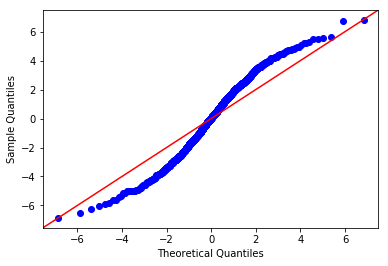

In [15]:
# sm.qqplot(trend_removed_5, line ='45')
import scipy.stats as stats
sm.qqplot(trend_removed_5, stats.t, distargs=(5,), line ='45') 
plt.show()

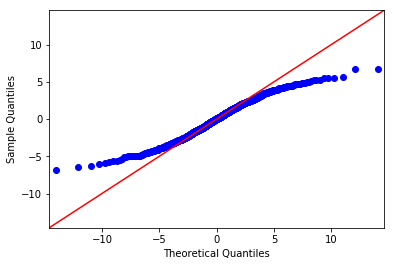

In [16]:
import scipy.stats as stats
sm.qqplot(trend_removed_5, stats.t, distargs=(5,), line ='45', loc = mean, scale = std) 
plt.show()

### Problem 1.4
It is known that we should select those beta values which return the least sum of squared difference between y_hat and the actual value y. Notice that for degree of 3 this value is 44303.27 and for degree 4 the value is 20423.22 (less than half of previous degree value), for degree 5 the value obtained 8349.92 is a significant reduction from the previous degree value but there after starting from degree 6 there is no significant improvement, although the sum of squared value is decreasing. This suggests that pursuing further from 5 will likely to overfit on the data.

In [17]:
data2 = pd.read_csv("data_ex2.csv", header= None)

### Problem 2.1

In [18]:
# initializing the values
def EM_algorithm(data, update_priors = False, iterations = 50):
    m = np.array([1 / 3, 1 / 3, 1 / 3])
    p_g = m
    n = 3
    mu = [5, -4, 2]
    sigma = [4, 3, 6]
    len_data = len(data)

    for i in range(0, iterations):
    #     updating priors
        if (i >= 1) and update_priors:
            p_g = []
            for i in range(0, n):
                p_g.append(np.sum(g[i]) / len_data)
        p_xg = []
    #     expectation step
        for i in range(0, n):
            p_xg.append(st.norm.pdf(data, loc=mu[i], scale=sigma[i]))
    #     set posterior
        g1 = []
        g2 = []
        g3 = []
        for i in range(0, len_data):
            d = (p_xg[0][i] * p_g[0] + p_xg[1][i] * p_g[1] + p_xg[2][i] * p_g[2])
            g1.append((p_xg[0][i] * p_g[0]) / d)
            g2.append((p_xg[1][i] * p_g[1]) / d)
            g3.append((p_xg[2][i] * p_g[2]) / d)
        g = [g1, g2, g3]
    #     maximization step
        for i in range(0, n):
            mu[i] = np.sum(np.multiply(g[i], data)) / np.sum(g[i])
            diff = [x - mu[i] for x in data]
            sigma[i] = math.sqrt(np.sum(np.multiply(g[i], np.power(diff, 2))) / np.sum(g[i]))
    return mu, sigma

def comp_Bins(data):
    intervals = int(round(math.sqrt(len(data))))
    binwidth = (max(data) - min(data)) / intervals
    return np.arange(min(data), max(data) + binwidth, binwidth)


def plotHist(data, d=False):
    bins_hist = comp_Bins(data)
    plt.hist(data, bins=bins_hist, density=d)
    plt.show()
    
def plotPDFHist(data, mu, sigma):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    bins_hist = comp_Bins(data)
    ax1.hist(data, bins=bins_hist, density=True, alpha=0.8, color='g')

    ax2 = ax1.twinx()

    plt.yticks([])

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    g1_pdf = st.norm.pdf(x, mu[0], sigma[0])
    g2_pdf = st.norm.pdf(x, mu[1], sigma[1])
    g3_pdf = st.norm.pdf(x, mu[2], sigma[2])

    ax2.plot(x, g1_pdf, 'k', linewidth=2, color="c")
    ax2.plot(x, g2_pdf, 'k', linewidth=2, color="m")
    ax2.plot(x, g3_pdf, 'k', linewidth=2, color="k")
    plt.show()
  

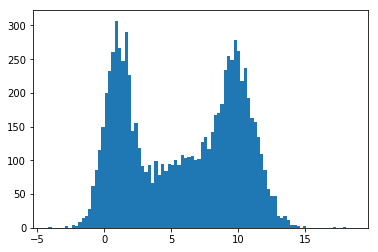

In [19]:
plotHist(data2[0])

Below are the results for Expectation Maximixation for given data with and without updating priors, both the results are quite similar.

### Problem 2.2

Expectation Maximixation with prior update


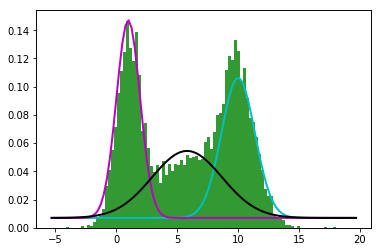


1. The means for the 3 Gaussians distributions are: [10.004  0.981  5.807]

2. The standard deviations for the 3 Gaussians distributions are: [1.373 0.973 2.873]


In [20]:
print("Expectation Maximixation with prior update")
mu, sigma = EM_algorithm(data2[0], update_priors= True)
plotPDFHist(data2[0], mu, sigma)
print("\n1. The means for the 3 Gaussians distributions are:", np.round(mu,3))
print("\n2. The standard deviations for the 3 Gaussians distributions are:", np.round(sigma,3))

Expectation Maximixation without prior update


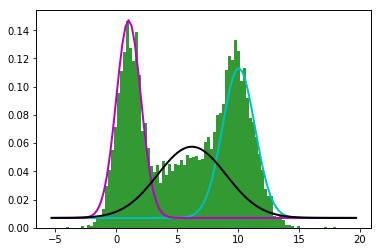


1. The means for the 3 Gaussians distributions are: [10.045  1.013  6.2  ]

2. The standard deviations for the 3 Gaussians distributions are: [1.337 1.013 2.811]


In [21]:
print("Expectation Maximixation without prior update")
mu, sigma = EM_algorithm(data2[0], update_priors= False)
plotPDFHist(data2[0], mu, sigma)
print("\n1. The means for the 3 Gaussians distributions are:", np.round(mu,3))
print("\n2. The standard deviations for the 3 Gaussians distributions are:", np.round(sigma,3))

In [22]:
def ls_trend_est(data, j):
    print("\nUsing a polynomial of degree: ",j)
    df1 = pd.DataFrame(columns=[0])
    df1[0] = data['x']**0
    for i in range(1,j):
        df1[i] = data['x']**i
    df1_transpose = df1.T
    A_dot_A_trans = df1_transpose.dot(df1)
    inv_p1 = pd.DataFrame(np.linalg.inv(A_dot_A_trans.values), A_dot_A_trans.columns, A_dot_A_trans.index)
    b = (inv_p1.dot(df1_transpose)).dot(data["y"])
#         b = np.array(list(reversed(b.values)))
    y_hat = data.loc[:,'x'].values.copy()
    for i in range(y_hat.size):
        temp = 0
        for j in range(b.size):
            temp += (y_hat[i]**j)*b[j]
        y_hat[i] = temp
    print('\nbeta values:\n',np.round(b,3))
    print('\ny_hat:\n',np.round(y_hat,3))
    min_beta_val = ((y_hat - data['y'])**2).sum()
    print('\nmin. beta values:', np.round(min_beta_val,3))
    plt.scatter(data['x'], data['y'], s = 3)
    plt.scatter(data['x'], y_hat, color='#FF0000')
    plt.show()
    return y_hat

#         plt.scatter(data["x"], data["y"], s = 3)
#         trendpoly = np.poly1d(b)
#         plt.plot(data["x"],trendpoly(data["x"]), color = 'orange')
#         print(trendpoly)
#         print("Given degree is =", j-1)
#         print("The residual sum of squares is =", (((df1.dot(b))-data['y'])**2).sum())
#         return(b)

In [23]:
def count(elements, s_prob=0.05):
    counter = 0
    for e in elements:
        if e <= s_prob:
            counter += 1
    return counter  

def experiment(n_trials=10000, n_exp=100, p_success=0.05):
    trials = []
    trials_success = []
    for t in range(n_trials):
        exp = np.random.uniform(0, 1, n_exp)
        p_trial = count(exp, p_success) / float(n_exp)
        trials.append(p_trial)
        trials_success.append(count(exp, p_success))
    return trials_success, n_trials, n_exp, p_success

def pmf(item, ocur):
    num_occurrences = 0
    probs = []
    for i in range(0, len(item)):
        num_occurrences += ocur[i]
        
    for i in range(0, len(item)):
        probs.append(ocur[i]/num_occurrences)
        
    plt.bar(item, probs)
    plt.show()
    return probs

def chiSquaredTest(pmf1, pmf2, alpha=5/100):
    #pmf1 ==> the one we observed 
    #pmf2 ==> the one we expected
    X = 0.0
    freedom = len(pmf1)-1
    sample_size_n = np.sum(pmf1)
    
    for i in range(0, len(pmf1)):
        X += (((pmf1[i]- (sample_size_n *pmf2[i])**2)/ (sample_size_n *pmf2[i]))) 
    p_value = 1 - st.chi2.cdf(X, freedom)
    
    if p_value < alpha:
        chi_res = False
    else:
        chi_res = True
        
    
    print(f"alpha is : {alpha} " )
    print(f"the P-value of the chi-squared test is: {np.round(p_value, 3)} " )
    
    return chi_res

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def plot_animate():
    ax.clear()
    _inside_points = np.array(inside_circle)
    _outside_points = np.array(outside_circle)
    
    _inside_x = 0 if len(_inside_points) == 0 else _inside_points[:,0]
    _inside_y = 0 if len(_inside_points) == 0 else _inside_points[:,1]
    _outside_x = 0 if len(_outside_points) == 0 else _outside_points[:,0]
    _outside_y = 0 if len(_outside_points) == 0 else _outside_points[:,1]
    
    ax.plot(_inside_x, _inside_y, marker='o', markersize=1, color='r',linestyle = 'None')
    ax.plot(_outside_x, _outside_y, marker='o', markersize=1, color='b',linestyle = 'None')
    
    fig.canvas.draw()
    
def intervalError(n_s, n_f, n, z=1.96): 
    return (1.96/n)*math.sqrt(n_s*(1-(n_s/float(n))))

def uniform_dis(num=10000):
    data = uniform(1, 0, num)
    return data

def inverse_transform(data= None, n_bins= 40, n_samples = 10000, avg_lambda=2):
    data = -np.log(data)/avg_lambda # inverse cdf of the exponential distribution
    hist, bin_edges = np.histogram(data, bins = n_bins, density = True)
    cumulative_values     = np.zeros(bin_edges.shape)
    cumulative_values[1:] = np.cumsum(hist * np.diff(bin_edges))
    inverse_CDF           = interpolate.interp1d(cumulative_values, bin_edges)
    r = np.random.rand(n_samples)
    return inverse_CDF(r)


Excersise 3.1 ===========================

successful Bernoulli experiments are with 10000 trials of 100 Bernoulli Experiments with a success probability of 0.05 


[Text(0, 0.5, 'Frequency')]

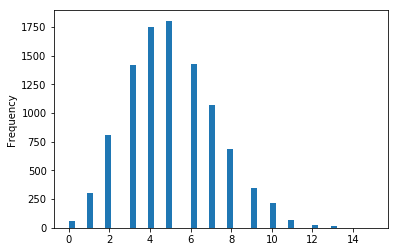

In [24]:
n_trials=10000
n_exp=100
p_success=0.05
trials = []
trials_success = []

print ("\nExcersise 3.1 ===========================\n") 
print("successful Bernoulli experiments are with 10000 trials of 100 Bernoulli Experiments with a success probability of 0.05 ")

trials_success, n_trials, n_exp, p_success = experiment()

ax = sns.distplot(trials_success,
                  kde=False,
                  hist_kws={'alpha':1})
ax.set( ylabel='Frequency')



Excersise 3.2 ===========================

the number of success probabilities Si For each trial i is: 15


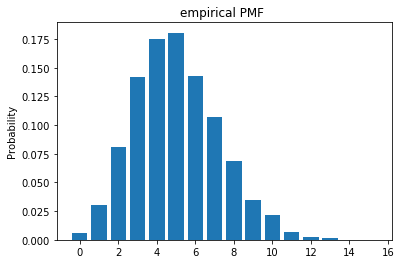

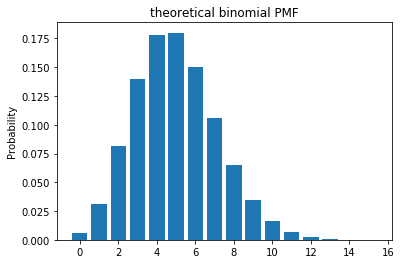

In [25]:
print ("\nExcersise 3.2 ===========================\n") 
print(f"the number of success probabilities Si For each trial i is: { (len(np.unique(trials_success, return_counts=True)[1])) }")

val, cnt = np.unique(trials_success, return_counts=True)
prop = cnt / n_trials

plt.title('empirical PMF ')
plt.bar(val, prop)
plt.ylabel("Probability")
plt.show()

x = val
binomial = st.binom.pmf(x, n_exp, p_success) 

plt.title('theoretical binomial PMF')
plt.bar(x, binomial)
plt.ylabel("Probability")
plt.show()



Excersise 3.3 ===========================

Poisson distribution


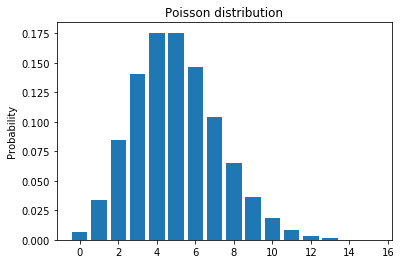

In [26]:
print ("\nExcersise 3.3 ===========================\n")
print("Poisson distribution")
poisson = st.poisson.pmf(x, n_exp*p_success) 

plt.title('Poisson distribution')
plt.bar(x, poisson)
plt.ylabel("Probability")
plt.show()


Exercise 4.1 ===========================

The PMF of the distribution that we observed is:


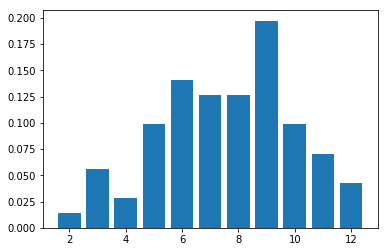


Exercise 4.2 ==========================

What we normaly expect from a 2-dice roll:


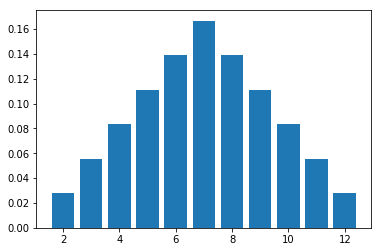

alpha is : 0.05 
the P-value of the chi-squared test is: 0.425 
The chi-squared result is: True
The null hypothesis should NOT be rejected!, which means the given hypothesis is very likely to be True 


In [27]:
print("\nExercise 4.1 ===========================\n")
print("The PMF of the distribution that we observed is:")

data = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ocur = [1, 4, 2, 7, 10, 9, 9, 14, 7, 5, 3]

pmf1=pmf(data, ocur) #pmfs1 ==> the one we observed
    
print("\nExercise 4.2 ==========================\n")
print("What we normaly expect from a 2-dice roll:")
data2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ocur2= [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
pmf2=pmf(data, ocur2) #pmfs2 ==> the one we expected

print(f"The chi-squared result is: {chiSquaredTest(pmf1, pmf2)}")
print(f"The null hypothesis should NOT be rejected!, which means the given hypothesis is very likely to be True " )




Excersise 5:======================================================
 
Points inside circle: 4940
Points outside circle: 1249
Estimate for Pi: 3.193
the success Confidence interval is: [0.8, 0.801]


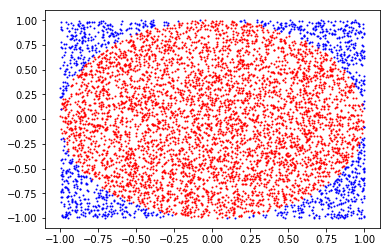

In [28]:
NUMBER_OF_SAMPLES = 10**5
REDRAW_EVERY_X = NUMBER_OF_SAMPLES/100

inside_circle, outside_circle = [], []
aprox_pi_list = []
temp_successRate = []
fig, ax = plt.subplots()
  
for i in range(NUMBER_OF_SAMPLES):
    x = -1 + 2*random.random()
    y = -1 + 2*random.random()
    r = math.sqrt(x**2 + y**2)
    inside_circle.append([x,y]) if (r<1) else outside_circle.append([x,y])
    aprox_pi_list.append(4*len(inside_circle)/(len(inside_circle)+len(outside_circle)))
    temp_successRate.append(len(inside_circle)/(len(inside_circle) + len(outside_circle))) 
    if not (i % REDRAW_EVERY_X): plot_animate()
    ie = intervalError(len(inside_circle), len(outside_circle), len(inside_circle)+len(outside_circle))    
    
    if((ie < 0.01) and (len(inside_circle) - len(outside_circle) > 10)):
        #print(intervalError(len(inside_circle), len(outside_circle), len(inside_circle)+len(outside_circle)))
        #print(len(inside_circle), len(outside_circle), len(inside_circle)+len(outside_circle))
        break
    
    
_inside, _outside = len(inside_circle), len(outside_circle)
aprox_pi = 4*_inside/(_inside+_outside)
mean = mean_confidence_interval(aprox_pi_list)[0]

print("\nExcersise 5:======================================================\n ")  
print("Points inside circle: {}".format(_inside))   
print("Points outside circle: {}".format(_outside))
print(f"Estimate for Pi: {np.round(aprox_pi, 3)}")
print(f"the success Confidence interval is: [{np.round(mean_confidence_interval(temp_successRate)[1], 3)}, {np.round(mean_confidence_interval(temp_successRate)[2], 3)}]")

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import scipy.interpolate as interpolate
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt





Excersise 6.1 =========================================

unform distribution:


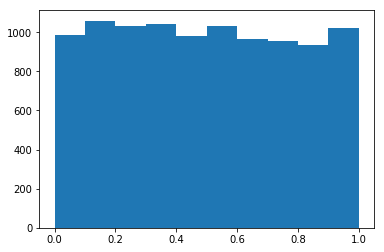



Inverse Transform Sampling from a uniform distribution with average value equal to 2:


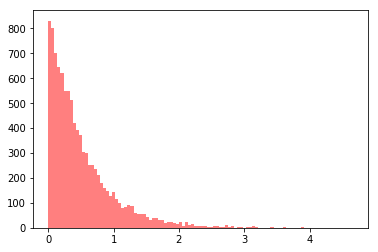

Extracted numbers:
[0.33349053 0.04823663 0.15058174 ... 0.72274084 0.10402629 0.05800955]


In [30]:
print("\nExcersise 6.1 =========================================\n")

print('unform distribution:')
plt.hist(uniform_dis())
plt.show();
print('\n')

print('Inverse Transform Sampling from a uniform distribution with average value equal to 2:')
data_IT = inverse_transform(uniform_dis())
plt.hist(data_IT, bins = 100, alpha = 0.5, color = "#ff0000")
plt.show();

print('Extracted numbers:')
print(data_IT)



Excersise 6.2 ===========================================


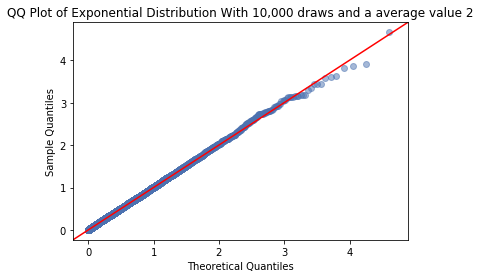

In [31]:
print("\n\nExcersise 6.2 ===========================================")

#the scale for an exponential distribution
avg_lambda=2
fig = sm.qqplot(data_IT, dist=st.expon, scale=(1/avg_lambda), line='45', alpha=0.5, color='#4C72B0') 
plt.title("QQ Plot of Exponential Distribution With 10,000 draws and a average value 2")
plt.show()


Excersise 6.3 ====================================

if we increase the average value to 4 we get:


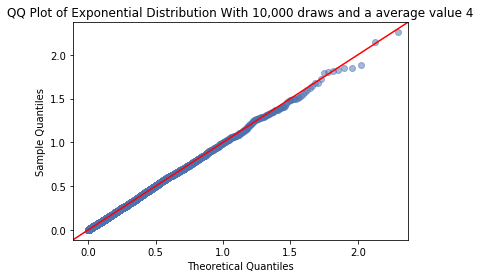


and if we increse the the muber of draws to *2 and *3 we will get a better estimation:


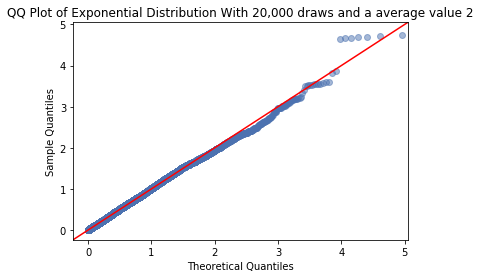

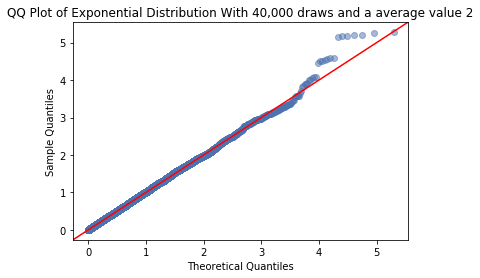

In [32]:
print("\nExcersise 6.3 ====================================\n")

print("if we increase the average value to 4 we get:")
data_IT_2 = inverse_transform(uniform_dis(), avg_lambda=4)
fig = sm.qqplot(data_IT_2, dist=st.expon, scale=(1/4), line='45', alpha=0.5, color='#4C72B0') 
plt.title("QQ Plot of Exponential Distribution With 10,000 draws and a average value 4")
plt.show()

print("\nand if we increse the the muber of draws to *2 and *3 we will get a better estimation:")

data_IT_3 = inverse_transform(uniform_dis(), n_samples=20000, avg_lambda=2)
fig = sm.qqplot(data_IT_3, dist=st.expon, scale=(1/2), line='45', alpha=0.5, color='#4C72B0') 
plt.title("QQ Plot of Exponential Distribution With 20,000 draws and a average value 2")
plt.show()

data_IT_4 = inverse_transform(uniform_dis(), n_samples=40000, avg_lambda=2)
fig = sm.qqplot(data_IT_4, dist=st.expon, scale=(1/2), line='45', alpha=0.5, color='#4C72B0') 
plt.title("QQ Plot of Exponential Distribution With 40,000 draws and a average value 2")
plt.show()